In [1]:
!pip install patsy
!pip install numpy
!pip install matplotlib
!pip install statsmodels
!pip install pandas
!pip install seaborn
!pip install pmdarima
!pip install openpyxl
!pip install sklearn 
!pip install gurobipy


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-w

In [438]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy
import pandas as pd  
import seaborn as sns
from pmdarima import auto_arima
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import gurobipy as gp
from gurobipy import GRB


In [439]:
ridership = pd.read_excel("Line_and_Stop_v3.xlsx")
ridership.head()

,FID,mode,season,year,route_id,route_name,direction_id,day_type_id,day_type_name,time_period_id,...,total_offs,number_service_days,average_ons,average_offs,average_flow,stop_order_real,main_branch,ashmont_branch,braintree_branch,average_flow_min
0,4801,1,Fall,2019,Red,Red Line,0,1,weekday,5,...,118221,77,0,1535,0,17.0,0,1,0,0.000000
1,4802,1,Fall,2019,Red,Red Line,0,1,weekday,5,...,45375,77,330,589,7553,11.0,1,0,0,50.691275
2,4803,1,Fall,2019,Red,Red Line,0,1,weekday,5,...,72016,77,0,935,0,18.0,0,0,1,0.000000
3,4804,1,Fall,2019,Red,Red Line,0,1,weekday,5,...,34439,77,1334,447,7287,7.0,1,0,0,48.906040
4,4805,1,Fall,2019,Red,Red Line,0,1,weekday,5,...,34045,77,1300,442,4835,5.0,1,0,0,32.449664


## Training and Testing 

In [440]:
# #Getting training and testing data

ridership_encoded = pd.get_dummies(ridership, columns=['day_type_name', 'stop_name', 'time_period_name'], prefix=['day_type', 'stop', 'time_period'], prefix_sep='_')
dummy_column_names = ridership_encoded.columns[ridership_encoded.columns.str.contains('day_type_name|stop_name|time_period_name')].tolist()
ridership_encoded[dummy_column_names] = ridership_encoded[dummy_column_names].astype(int)

ridership_encoded.head()
ridership_encoded.to_csv("ridership_encoded.csv", index=False)

# ridership_train1 = ridership_encoded[(ridership_encoded['year'] == 2017) | (ridership_encoded['year'] == 2018)] 
# ridership_test1 = ridership_encoded[(ridership_encoded['year'] == 2019)]

# print(ridership_train1

ridership_train = ridership[(ridership['year'] == 2017) | (ridership['year'] == 2018)]
ridership_test= ridership[(ridership['year'] == 2019)]

ridership_train

,FID,mode,season,year,route_id,route_name,direction_id,day_type_id,day_type_name,time_period_id,...,total_offs,number_service_days,average_ons,average_offs,average_flow,stop_order_real,main_branch,ashmont_branch,braintree_branch,average_flow_min
396,6015,1,Fall,2018,Red,Red Line,0,1,weekday,5,...,41119,19,2707,2164,7786,8.0,1,0,0,52.255034
397,6016,1,Fall,2018,Red,Red Line,0,1,weekday,1,...,624,19,0,33,0,17.0,0,1,0,0.000000
398,6047,1,Fall,2018,Red,Red Line,0,1,weekday,3,...,71405,19,2465,3758,9193,9.0,1,0,0,77.252101
399,6062,1,Fall,2018,Red,Red Line,0,1,weekday,5,...,1431,19,577,75,2012,3.0,1,0,0,13.503356
400,6063,1,Fall,2018,Red,Red Line,0,1,weekday,3,...,6973,19,146,367,611,15.0,0,1,0,5.134454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,7896,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,3335,82,1,41,25,16.0,0,0,1,0.139665
1184,7897,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,2158,82,1,26,185,14.0,0,1,0,1.033520
1185,7898,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,7298,82,0,89,26,16.0,0,1,0,0.145251
1186,7899,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,1517,82,73,19,415,10.0,1,0,0,2.318436


In [441]:
def calculate_mape(y_true, y_pred):
    mask = y_true != 0  # Create a boolean mask for non-zero true values
    y_true_nonzero = y_true[mask]
    y_pred_nonzero = y_pred[mask]
    
    if len(y_true_nonzero) == 0:
        return np.nan  # Return NaN if there are no non-zero true values
    
    mape = np.mean(np.abs((y_true_nonzero - y_pred_nonzero) / y_true_nonzero)) * 100
    return mape

#print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


In [442]:
from sklearn.metrics import make_scorer, r2_score

def outsample_r2_scoring(y_true, y_pred):
    # Ensure predictions are greater than 0; Meant for out-of-sample R^2
    y_pred[y_pred <= 0] = 0
    
    # Calculate R^2
    r2 = r2_score(y_true, y_pred)
    
    return r2

## Linear Regression

In [443]:
#Regression 
formula = 'average_flow ~ C(time_period_name) + direction_id + C(stop_id)'
y, X = patsy.dmatrices(formula, data=ridership_train, return_type='dataframe')


# Fit the regression m#C(time_period_name, Treatment)odel
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())
#C(time_period_name, Treatment)

                            OLS Regression Results                            
Dep. Variable:           average_flow   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     39.98
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          8.88e-135
Time:                        17:44:06   Log-Likelihood:                -7356.8
No. Observations:                 792   AIC:                         1.478e+04
Df Residuals:                     761   BIC:                         1.492e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

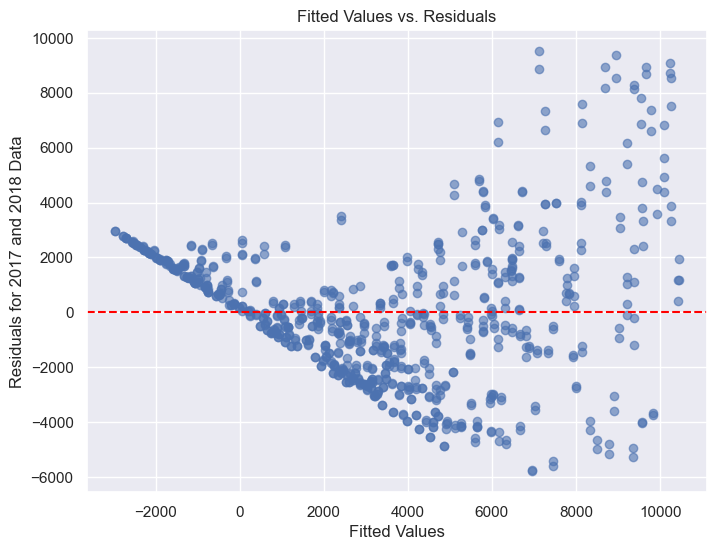

In [444]:
#Make residual graph for 2017, 2018:
fitted_values = model.fittedvalues

# Calculate residuals (actual - predicted)
residuals = model.resid

# Create the scatter plot of Fitted Values vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')


# Label the axes and add a title
plt.xlabel('Fitted Values')
plt.ylabel('Residuals for 2017 and 2018 Data')
plt.title('Fitted Values vs. Residuals')

# Show the plot
plt.grid(True)
plt.show()

In [445]:
#Regression 
#formula = 'average_flow ~ C(time_period_name, Treatment) + C(day_type_name, Treatment) + direction_id + C(stop_name)'

# Create the design matrix and dependent variable using patsy
y_test, X_test = patsy.dmatrices(formula, data=ridership_test, return_type='dataframe')

y_pred=model.predict(X_test)

# Convert y_pred and y_test to lists
y_pred_list = y_pred.tolist()
y_test_list = y_test['average_flow'].tolist()

# Ensure non-negative predictions
y_new = [max(0, i) for i in y_pred_list]

# Calculate residuals
residuals_test1 = [y_test_list[i] - y_new[i] for i in range(len(y_new))]
residuals_test2 = [y_test_list[i] - y_pred_list[i] for i in range(len(y_new))]


mape_1 = [abs(residuals_test1[i])/y_test_list[i] for i in range(len(y_test_list)) if y_test_list[i]!=0]   
mape_2 = [abs(residuals_test2[i])/y_test_list[i] for i in range(len(y_test_list)) if y_test_list[i]!=0]    

print('MAPE_1', sum(mape_1)/len(mape_1)*100)    
print('MAPE_2', sum(mape_2)/len(mape_2)*100)                                         


r2 = outsample_r2_scoring(y_test, y_pred)
print("Out-of-sample R^2:", r2)
# # Display results
# print("MAPE on test data (2019) using residuals from train data regression:", mape_test)


MAPE_1 216.50239074126313
MAPE_2 1780.385538414976
Out-of-sample R^2: 0.6329743637667238


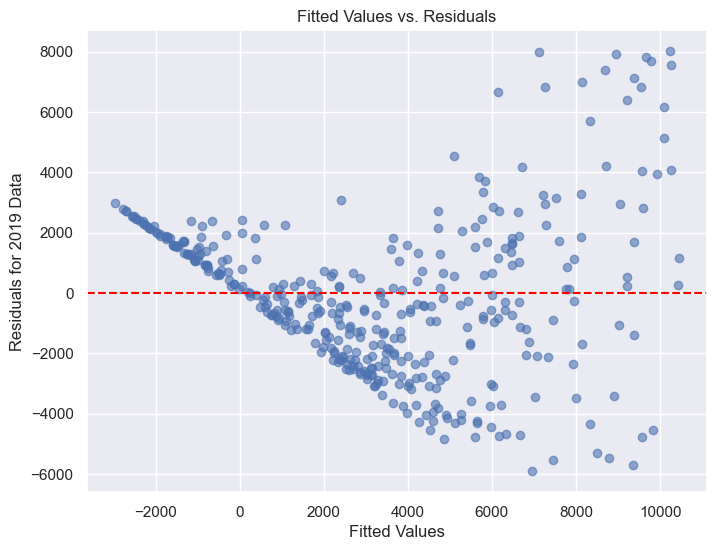

In [446]:
#Make residual graph for 2019:
fitted_values = y_pred_list

# Calculate residuals (actual - predicted)
residuals = residuals_test2

# Create the scatter plot of Fitted Values vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')


# Label the axes and add a title
plt.xlabel('Fitted Values')
plt.ylabel('Residuals for 2019 Data')
plt.title('Fitted Values vs. Residuals')

# Show the plot
plt.grid(True)
plt.show()

## Linear Regression: Nonzero Values

In [447]:
# Identify rows where predictions are less than 0
predictions_old = model.predict(X)

predictions_old.tolist()

rows_to_remove = ridership_train[predictions_old <= 0].index

# Remove rows from the dataset
ridership_filtered = ridership_train.drop(index=rows_to_remove)

predictions_old.to_excel("old_regression_preds.xlsx", index = False)

predictions_new = predictions_old.drop(index=rows_to_remove)

predictions_new.to_excel("new_regression_preds.xlsx", index = False)

# Print the filtered dataset
# print(ridership_filtered['stop_name'])

# # Specify the file path where you want to save the Excel file
# excel_file_path = 'filtered_ridership_data1.xlsx'

# # Export the filtered DataFrame to Excel
# ridership_filtered.to_excel(excel_file_path, index=False)

# print(f"Filtered DataFrame exported to {excel_file_path}")

In [448]:
print(len(rows_to_remove))

156


In [449]:
ridership1 = pd.read_excel("filtered_ridership_data1.xlsx")

ridership_train1 = ridership1[(ridership1['year'] == 2017) | (ridership1['year'] == 2018)]

ridership_test1 = ridership[(ridership['year'] == 2019)]

formula1 = 'average_flow ~ C(time_period_name) + direction_id + C(stop_id)'
y1, X1 = patsy.dmatrices(formula1, data=ridership_train1, return_type='dataframe')

# Fit the regression m#C(time_period_name, Treatment)odel
model_new = sm.OLS(y1, X1).fit()

# Display regression results
print(model_new.summary())
#C(time_period_name, Treatment)

                            OLS Regression Results                            
Dep. Variable:           average_flow   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     40.49
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          6.73e-124
Time:                        17:44:26   Log-Likelihood:                -5884.1
No. Observations:                 636   AIC:                         1.183e+04
Df Residuals:                     605   BIC:                         1.197e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [450]:

formula1 = 'average_flow ~ C(time_period_name) + direction_id + C(stop_id)'

# Create the design matrix and dependent variable using patsy
y_test, X_test = patsy.dmatrices(formula1, data=ridership1, return_type='dataframe')

y_pred=model_new.predict(X_test)

# Convert y_pred and y_test to lists
y_pred_list = y_pred.tolist()
y_test_list = y_test['average_flow'].tolist()

# Ensure non-negative predictions
y_new = [max(0, i) for i in y_pred_list]

# Calculate residuals
residuals_test1 = [y_test_list[i] - y_new[i] for i in range(len(y_new))] #residuals if truncated at 0
residuals_test2 = [y_test_list[i] - y_pred_list[i] for i in range(len(y_new))] #normal residuals, non truncated


mape_1 = [abs(residuals_test1[i])/y_test_list[i] for i in range(len(y_test_list)) if y_test_list[i]!=0]   
mape_2 = [abs(residuals_test2[i])/y_test_list[i] for i in range(len(y_test_list)) if y_test_list[i]!=0]    

print('MAPE_1', sum(mape_1)/len(mape_1)*100)    
print('MAPE_2', sum(mape_2)/len(mape_2)*100)  


r2 = outsample_r2_scoring(y_test, y_pred)
print("Out-of-sample R^2:", r2)  
  

MAPE_1 101.647078264381
MAPE_2 143.01809939660626
Out-of-sample R^2: 0.6831104003022247


## CART Model

In [453]:
#CART Model 
features = ['stop_name', 'time_period_name']


x_train = ridership_train[features]
x_train = pd.get_dummies(x_train, columns=features).astype(int)
x_train['direction_id'] = ridership_train['direction_id']

x_train_cart = x_train.copy()

x_test = ridership_test[features]
x_test = pd.get_dummies(x_test, columns=features).astype(int)
x_test['direction_id'] = ridership_test['direction_id']

x_test_cart = x_test.copy()

y_train = ridership_train['average_flow']


y_test = ridership_test['average_flow']

y_train_cart = y_train.copy()
y_test_cart = y_test.copy() 

## To incorporate in selected CART model

In [16]:
# feature_importances = cart_model.feature_importances_
# feature_importance_df = pd.DataFrame({
#     'Feature': x_train.columns,
#     'Importance': feature_importances
# })

# # Sort the DataFrame by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# feature_importance_df

,Feature,Importance
31,direction_id,0.416596
3,stop_name_Braintree,0.197194
0,stop_name_Alewife,0.179513
2,stop_name_Ashmont,0.165402
28,time_period_name_NIGHT,0.041295
18,stop_name_Savin Hill,0.000000
30,time_period_name_VERY_EARLY_MORNING,0.000000
29,time_period_name_PM_PEAK,0.000000
27,time_period_name_MIDDAY_SCHOOL,0.000000
26,time_period_name_MIDDAY_BASE,0.000000


In [17]:
top_features = feature_importance_df.head(5)['Feature'].tolist()

top_features, feature_importance_df.head(5)['Importance'].tolist()

(['direction_id',
  'stop_name_Braintree',
  'stop_name_Alewife',
  'stop_name_Ashmont',
  'time_period_name_NIGHT'],
 [0.4165959622961683,
  0.19719429561012908,
  0.17951277908855295,
  0.165401736421856,
  0.04129522658329366])

In [18]:
y_pred = cart_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        28
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.11      1.00      0.20         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         1
          23       0.01      1.00      0.02         3
          25       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          38       0.00    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

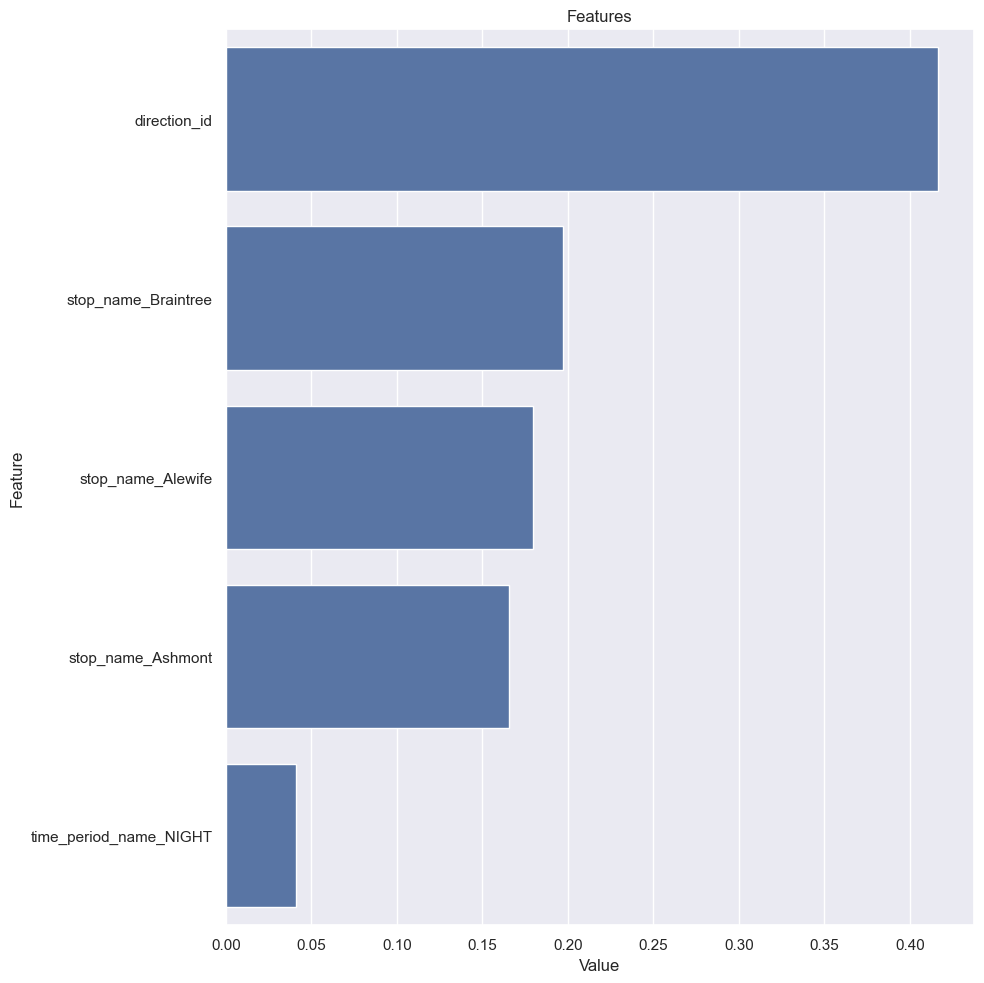

In [19]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(cart_model, x_train, 5)

## Hyperparameter Tuning: CART Model

In [454]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# or 'entropy' for classification, 'mse' for regression
cart_model_1 = DecisionTreeClassifier()

param_grid = {
    'splitter': ['best'],
    'max_depth': [None, 1, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100, 150],
    'min_samples_leaf': [1, 2, 5, 10, 20, 30, 50, 100, 150],
    'max_features': [None]
}

grid_search = GridSearchCV(estimator=cart_model_1, param_grid=param_grid, cv=10, scoring='r2')
grid_search.fit(x_train_cart, y_train_cart)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_cart = best_model.predict(x_test)
y_pred_cart[y_pred_cart <= 0] = 0

# Evaluate the model

# Print the score of the best parameters
print("Best Score:", grid_search.best_score_)  # Note the negative sign due to neg_mean_squared_error


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Score: 0.9351006975767936


In [455]:
print(len(y_pred_cart))

396


In [436]:
print(len(best_model.predict(x_test)))

396


In [457]:
# Convert y_pred and y_test to lists
y_pred_list = y_pred_cart.tolist()
y_test_list = y_test_cart.tolist()

# Ensure non-negative predictions
y_new = [max(0, i) for i in y_pred_list]

# Calculate residuals
residuals_test1 = [y_test_list[i] - y_new[i] for i in range(len(y_new))] #residuals if truncated at 0
residuals_test2 = [y_test_list[i] - y_pred_list[i] for i in range(len(y_new))] #normal residuals, non truncated


mape_1 = [abs(residuals_test1[i])/y_test_list[i] for i in range(len(y_test_list)) if y_test_list[i]!=0]   
mape_2 = [abs(residuals_test2[i])/y_test_list[i] for i in range(len(y_test_list)) if y_test_list[i]!=0]    

print('MAPE_1', sum(mape_1)/len(mape_1)*100)    
print('MAPE_2', sum(mape_2)/len(mape_2)*100)  

# accuracy = accuracy_score(y_test, y_pred_1)
# print("Accuracy:", accuracy)

mape = calculate_mape(y_test_cart, y_pred_cart)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

r2 = outsample_r2_scoring(y_test_cart, y_pred_cart)
print("Out-of-sample R^2:", r2)  

MAPE_1 11.880609548774013
MAPE_2 11.880609548774013
Mean Absolute Percentage Error (MAPE): 11.88%
Out-of-sample R^2: 0.9954562298565321


## Filtering Data Based on CART Model Predictions

In [355]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_cart_train = best_model.predict(x_train)

predictions_old = y_pred_cart_train

ridership_train_cart = ridership_train.copy()

rows_to_remove = ridership_train_cart[predictions_old <= 0].index

# Remove rows from the dataset
ridership_filtered_cart = ridership_train_cart.drop(index=rows_to_remove)

# Specify the file path where you want to save the Excel file
excel_file_path = 'filtered_ridership_data_cart.xlsx'

# Export the filtered DataFrame to Excel
ridership_filtered_cart.to_excel(excel_file_path, index=False)

ridership_filtered_cart

,FID,mode,season,year,route_id,route_name,direction_id,day_type_id,day_type_name,time_period_id,...,total_offs,number_service_days,average_ons,average_offs,average_flow,stop_order_real,main_branch,ashmont_branch,braintree_branch,average_flow_min
396,6015,1,Fall,2018,Red,Red Line,0,1,weekday,5,...,41119,19,2707,2164,7786,8.0,1,0,0,52.255034
398,6047,1,Fall,2018,Red,Red Line,0,1,weekday,3,...,71405,19,2465,3758,9193,9.0,1,0,0,77.252101
399,6062,1,Fall,2018,Red,Red Line,0,1,weekday,5,...,1431,19,577,75,2012,3.0,1,0,0,13.503356
400,6063,1,Fall,2018,Red,Red Line,0,1,weekday,3,...,6973,19,146,367,611,15.0,0,1,0,5.134454
401,6065,1,Fall,2018,Red,Red Line,0,1,weekday,1,...,686,19,19,36,283,11.0,1,0,0,1.581006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,7896,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,3335,82,1,41,25,16.0,0,0,1,0.139665
1184,7897,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,2158,82,1,26,185,14.0,0,1,0,1.033520
1185,7898,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,7298,82,0,89,26,16.0,0,1,0,0.145251
1186,7899,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,1517,82,73,19,415,10.0,1,0,0,2.318436


## CART Model (Filtered Data)

In [361]:
#CART Model 
features = ['stop_name', 'time_period_name']
#categorical_features = ['stop_name', 'time_period_name', 'day_type_name']


x_train_cart_filtered = ridership_filtered_cart[features]
x_train_cart_filtered = pd.get_dummies(x_train_cart_filtered, columns=features).astype(int)
x_train_cart_filtered['direction_id'] = ridership_filtered_cart['direction_id']


x_test_cart_filtered = ridership_test[features]
x_test_cart_filtered = pd.get_dummies(x_test_cart_filtered, columns=features).astype(int)
x_test_cart_filtered['direction_id'] = ridership_test1['direction_id']

y_train_cart_filtered = ridership_filtered_cart['average_flow']
y_test_cart_filtered = ridership_test1['average_flow']

#x_train['year'] = ridership_train['year']

y_train_cart_filtered

396     7786
398     9193
399     2012
400      611
401      283
        ... 
1183      25
1184     185
1185      26
1186     415
1187      66
Name: average_flow, Length: 736, dtype: int64

In [365]:
unique_classes = pd.value_counts(ridership_train1['average_flow']).index
print("Unique Classes:", unique_classes)

Unique Classes: Index([    0,   336,  2028,   851,  8538,  2473,    55,   620,   305,  2026,
       ...
        1447,  1442, 12379,  2023,   660,  5166, 11521,  2024, 11218,   415],
      dtype='int64', name='average_flow', length=580)


In [366]:
class_counts = pd.value_counts(ridership_train1['average_flow'])
print("Class Counts:")
print(class_counts)

Class Counts:
average_flow
0        30
336       3
2028      2
851       2
8538      2
         ..
5166      1
11521     1
2024      1
11218     1
415       1
Name: count, Length: 580, dtype: int64


## Hyperparameter Tuning: CART Model (Filtered Data)

In [367]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# or 'entropy' for classification, 'mse' for regression
cart_model_filtered_1 = DecisionTreeClassifier()

param_grid = {
    'splitter': ['best'],
    'max_depth': [None, 1, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100, 150],
    'min_samples_leaf': [1, 2, 5, 10, 20, 30, 50, 100, 150],
    'max_features': [None],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search_cart_filtered = GridSearchCV(estimator=cart_model_filtered_1, param_grid=param_grid, cv=4, scoring='r2')
grid_search_cart_filtered.fit(x_train_cart_filtered, y_train_cart_filtered)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search_cart_filtered.best_params_)

# Get the best model from the grid search
best_model_cart_filtered = grid_search_cart_filtered.best_estimator_

# Make predictions on the test set
y_pred_cart_filtered_1 = best_model_cart_filtered.predict(x_test_cart_filtered)
y_pred_cart_filtered_1[y_pred_cart_filtered_1 <= 0] = 0

# Evaluate the model

# Print the score of the best parameters
print("Best Score:", grid_search_cart_filtered.best_score_)  # Note the negative sign due to neg_mean_squared_error

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Best Hyperparameters: {'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Score: 0.7566703210304238


In [368]:
# Convert y_pred and y_test to lists
y_pred_cart_filtered_1_list = y_pred_cart_filtered_1.tolist()
y_test_cart_filtered_list = y_test_cart_filtered.tolist()

# Ensure non-negative predictions
y_new = [max(0, i) for i in y_pred_cart_filtered_1_list]

# Calculate residuals
residuals_test1 = [y_test_cart_filtered_list[i] - y_new[i] for i in range(len(y_new))] #residuals if truncated at 0
residuals_test2 = [y_test_cart_filtered_list[i] - y_pred_cart_filtered_1_list[i] for i in range(len(y_new))] #normal residuals, non truncated


mape_1 = [abs(residuals_test1[i])/y_test_cart_filtered_list[i] for i in range(len(y_test_cart_filtered_list)) if y_test_cart_filtered_list[i]!=0]   
mape_2 = [abs(residuals_test2[i])/y_test_cart_filtered_list[i] for i in range(len(y_test_cart_filtered_list)) if y_test_cart_filtered_list[i]!=0]    

print('MAPE_1', sum(mape_1)/len(mape_1)*100)    
print('MAPE_2', sum(mape_2)/len(mape_2)*100)  

# accuracy = accuracy_score(y_test, y_pred_1)
# print("Accuracy:", accuracy)

mape = calculate_mape(y_test_cart_filtered, y_pred_cart_filtered_1)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

r2 = outsample_r2_scoring(y_test_cart_filtered, y_pred_cart_filtered_1)
print("Out-of-sample R^2:", r2)  

MAPE_1 14.598000853121833
MAPE_2 14.598000853121833
Mean Absolute Percentage Error (MAPE): 14.60%
Out-of-sample R^2: 0.8028678261391833


## Hyperparameter Tuning: Random Forest 

In [120]:
dff = pd.read_excel("Line_and_Stop_v3.xlsx")
dummies = pd.get_dummies(dff[['stop_name', 'time_period_name']])
dummies = dummies.replace({True: 1, False: 0})

y_train_forest = dff.loc[(dff['year'] == 2017) | (dff['year'] == 2018), 'average_flow']
y_test_forest = dff.loc[dff['year'] == 2019, 'average_flow']

X_numerical = dff.drop(['average_flow', 'day_type_name', 'stop_name', 'time_period_name', 'season',
                        'route_id','route_name', 'stop_id','stop_order_real', 
                        'mode', 'FID', 'day_type_name', 'day_type_id', 'main_branch',
                        'ashmont_branch', 'braintree_branch', 'average_ons', 'average_offs', 'average_flow_min', 'number_service_days', 'total_ons', 'total_offs'], axis=1).astype('float64')


X = pd.concat([X_numerical, dummies], axis=1) # Create all features
feature_names = X.columns

X_train_forest = X[(X['year'] == 2017) | (X['year'] == 2018)]
X_test_forest = X[(X['year'] == 2019)]


In [26]:
param_grid = {
    'n_estimators': [50, 100, 300, 500, 1000],
    'max_depth': [None, 3, 4, 5, 6, 7, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}

# Create the Random Forest Regressor
reg = RandomForestRegressor(random_state = 42, warm_start=True, oob_score=True)

# Perform grid search
grid_search_forest = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='r2', cv=10) #score r2
grid_search_forest.fit(X_train_forest, y_train_forest)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search_forest.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [121]:
# Get the best model from the grid search
best_reg = grid_search_forest.best_estimator_

# Make predictions on the test set
y_pred_forest = best_reg.predict(X_test_forest)
y_pred_forest[y_pred_forest <= 0] = 0
# Evaluate the model

# Print the score of the best parameters
print("Best Score:", grid_search_forest.best_score_)  # Note the negative sign due to neg_mean_squared_error

# Print the MAPE of the model
mape = calculate_mape(y_test_forest, y_pred_forest)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

r2= outsample_r2_scoring(y_test_forest, y_pred_forest)
print("Out-of-sample R^2:", r2)  

Best Score: 0.8524149438227369
Mean Absolute Percentage Error (MAPE): 23.97%
Out-of-sample R^2: 0.977857679702886


## Filtering Data for the Unfiltered Random Forest Model Prections 

### (Rows where unfiltered predictions are <= 0)

In [369]:
# Get the best model from the grid search
best_reg = grid_search_forest.best_estimator_

# Make predictions on the test set
y_pred_forest_train = best_reg.predict(X_train_forest)

predictions_old = y_pred_forest_train

ridership_train_forest = ridership_train.copy()

rows_to_remove = ridership_train_forest[predictions_old <= 0].index

# Remove rows from the dataset
ridership_filtered_forest = ridership_train_forest.drop(index=rows_to_remove)

# Specify the file path where you want to save the Excel file
excel_file_path = 'filtered_ridership_data_forest.xlsx'

# Export the filtered DataFrame to Excel
ridership_filtered_forest.to_excel(excel_file_path, index=False)

ridership_filtered_forest 

,FID,mode,season,year,route_id,route_name,direction_id,day_type_id,day_type_name,time_period_id,...,total_offs,number_service_days,average_ons,average_offs,average_flow,stop_order_real,main_branch,ashmont_branch,braintree_branch,average_flow_min
396,6015,1,Fall,2018,Red,Red Line,0,1,weekday,5,...,41119,19,2707,2164,7786,8.0,1,0,0,52.255034
397,6016,1,Fall,2018,Red,Red Line,0,1,weekday,1,...,624,19,0,33,0,17.0,0,1,0,0.000000
398,6047,1,Fall,2018,Red,Red Line,0,1,weekday,3,...,71405,19,2465,3758,9193,9.0,1,0,0,77.252101
399,6062,1,Fall,2018,Red,Red Line,0,1,weekday,5,...,1431,19,577,75,2012,3.0,1,0,0,13.503356
400,6063,1,Fall,2018,Red,Red Line,0,1,weekday,3,...,6973,19,146,367,611,15.0,0,1,0,5.134454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,7896,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,3335,82,1,41,25,16.0,0,0,1,0.139665
1184,7897,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,2158,82,1,26,185,14.0,0,1,0,1.033520
1185,7898,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,7298,82,0,89,26,16.0,0,1,0,0.145251
1186,7899,1,Fall,2017,Red,Red Line,0,1,weekday,9,...,1517,82,73,19,415,10.0,1,0,0,2.318436


## Random Forest (Filtered Data)

In [374]:
dff = pd.read_excel('filtered_ridership_data_forest.xlsx')
dummies = pd.get_dummies(dff[['stop_name', 'time_period_name']])
dummies = dummies.replace({True: 1, False: 0})

y_train_forest_filtered = dff.loc[(dff['year'] == 2017) | (dff['year'] == 2018), 'average_flow']
y_test_forest_filtered = y_test_forest 

X_numerical = dff.drop(['average_flow', 'day_type_name', 'stop_name', 'time_period_name', 'season',
                        'route_id','route_name', 'stop_id','stop_order_real', 
                        'mode', 'FID', 'day_type_name', 'day_type_id', 'main_branch',
                        'ashmont_branch', 'braintree_branch', 'average_ons', 'average_offs', 'average_flow_min', 'number_service_days', 'total_ons', 'total_offs'], axis=1).astype('float64')


X = pd.concat([X_numerical, dummies], axis=1) # Create all features
feature_names = X.columns

X_train_forest_filtered = X[(X['year'] == 2017) | (X['year'] == 2018)]

X_train_forest_filtered = X_train_forest_filtered.drop('year', axis=1)

X_test_forest_filtered = X_test_forest.copy()

X_test_forest_filtered = X_test_forest_filtered.drop('year', axis=1)



In [376]:
X_train_forest_filtered.columns 

Index(['direction_id', 'time_period_id', 'stop_name_Alewife',
       'stop_name_Andrew', 'stop_name_Ashmont', 'stop_name_Braintree',
       'stop_name_Broadway', 'stop_name_Central', 'stop_name_Charles/MGH',
       'stop_name_Davis', 'stop_name_Downtown Crossing',
       'stop_name_Fields Corner', 'stop_name_Harvard', 'stop_name_JFK/Umass',
       'stop_name_Kendall/MIT', 'stop_name_North Quincy',
       'stop_name_Park Street', 'stop_name_Porter', 'stop_name_Quincy Adams',
       'stop_name_Quincy Center', 'stop_name_Savin Hill', 'stop_name_Shawmut',
       'stop_name_South Station', 'stop_name_Wollaston',
       'time_period_name_AM_PEAK', 'time_period_name_EARLY_AM',
       'time_period_name_EVENING', 'time_period_name_LATE_EVENING',
       'time_period_name_MIDDAY_BASE', 'time_period_name_MIDDAY_SCHOOL',
       'time_period_name_NIGHT', 'time_period_name_PM_PEAK',
       'time_period_name_VERY_EARLY_MORNING'],
      dtype='object')

## Hyperparameter Tuning: Random Forest (Filtered Data)

In [377]:
param_grid = {
    'n_estimators': [50, 100, 300, 500, 1000],
    'max_depth': [None, 3, 4, 5, 6, 7, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]

}

# Create the Random Forest Regressor
reg_forest_filtered = RandomForestRegressor(random_state = 42, warm_start=True, oob_score=True)

# Perform grid search
grid_search_forest_filtered = GridSearchCV(estimator=reg_forest_filtered, param_grid=param_grid, scoring='r2', cv=4)
grid_search_forest_filtered.fit(X_train_forest_filtered, y_train_forest_filtered)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search_forest_filtered.best_params_)

# Get the best model from the grid search
best_reg_filtered = grid_search_forest_filtered.best_estimator_


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [378]:
# Make predictions on the test set
y_pred_forest_filtered = best_reg_filtered.predict(X_test_forest_filtered)
y_pred_forest_filtered[y_pred_forest_filtered <= 0] = 0

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- year


In [ ]:
# Evaluate the model
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search_forest_filtered.best_params_)

# Print the score of the best parameters
print("Best Score (R^2):", grid_search_forest_filtered.best_score_)  # Note the negative sign due to neg_mean_squared_error

# Print the MAPE of the model
mape = calculate_mape(y_test_forest_filtered, y_pred_forest_filtered)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

r2= outsample_r2_scoring(y_test_forest_filtered, y_pred_forest_filtered)
print("Out-of-sample R^2:", r2)  

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Best Score (R^2): 0.8363805854182434
Mean Absolute Percentage Error (MAPE): 278.97%
Out-of-sample R^2: 0.9654291024036095


## Optimization Model


### Transforming results into matrix form

In [419]:
#CART Model 
df = pd.read_excel("Line_and_Stop_v3.xlsx")
features = ['stop_name', 'time_period_id', 'year', 'main_branch','ashmont_branch', 'braintree_branch','direction_id']

x_train_cart= ridership_train[features]
x_test_cart = ridership_test[features]

dff = pd.DataFrame(x_test_cart)

In [458]:
predictions = y_pred_cart
result_df = pd.concat([dff, pd.Series(predictions, name='average_flow_predictions')], axis=1)
result_df.columns

Index(['stop_name', 'time_period_id', 'year', 'main_branch', 'ashmont_branch',
       'braintree_branch', 'direction_id', 'average_flow_predictions'],
      dtype='object')

In [459]:
result_df

,stop_name,time_period_id,year,main_branch,ashmont_branch,braintree_branch,direction_id,average_flow_predictions
0,Ashmont,5,2019,0,1,0,0,0
1,Broadway,5,2019,1,0,0,0,7720
2,Braintree,5,2019,0,0,1,0,0
3,Charles/MGH,5,2019,1,0,0,0,7199
4,Central,5,2019,1,0,0,0,5026
...,...,...,...,...,...,...,...,...
391,Wollaston,2,2019,0,0,1,1,2699
392,Alewife,3,2019,1,0,0,1,0
393,Andrew,3,2019,1,0,0,1,16858
394,Ashmont,3,2019,0,1,0,1,3136


In [460]:
#Make a copy 
result_new_df = result_df.copy()


In [461]:
# Dictionary mapping of red line stops
stop_id_dict={"Alewife": 0, "Davis":1, "Porter": 2, "Harvard":3, "Central": 4, "Kendall/MIT": 5, 
              "Charles/MGH": 6, "Park Street": 7, "Downtown Crossing": 8, "South Station": 9,
              "Broadway": 10, "Andrew": 11, "JFK/Umass": 12, "Savin Hill": 13, "Fields Corner": 14,
              "Shawmut": 15, "Ashmont": 16, "North Quincy": 17, "Wollaston": 18, "Quincy Center": 19,
              "Quincy Adams": 20, "Braintree": 21}
#0---> main
#1---> left
#2----> right1}

#Dictionary of branches
branches_dict={0: [0,1,2,3,4,5,6,7,8,9,10,11,12], 1:[13,14,15,16], 2:[17,18,19,20,21]}

#Dictionary of minutes in each time interval
time_dict={0:180, 1:60, 2:120, 3:270, 4:150, 5:150, 6:210, 7:120, 8:180}

#Dictionary maping each time interval to be 0 indexed
time_index_dict={1: 0, 2:1, 3:2 , 4:3, 5:4, 6:5, 7:6, 8:7, 9:8}

In [462]:
#Create a new column that contains the order of the stations 
result_new_df['stop_id'] = result_df['stop_name'].map(stop_id_dict)
result_new_df['time_period_id'] = result_df['time_period_id'].map(time_index_dict)
result_new_df['average_flow_minute'] = result_new_df['time_period_id'].map(time_dict)
result_new_df['average_flow_minute'] = result_df['average_flow_predictions'] / result_new_df['average_flow_minute']



In [463]:
result_new_df['time_period_id'] = result_new_df['time_period_id'].astype(int)

In [464]:
#Seperate the dataframes based on direction
result_new_df_0=result_new_df[result_new_df["direction_id"] == 0]
result_new_df_1=result_new_df[result_new_df["direction_id"] == 1]


In [465]:
#Add branches and direction to the matrix
pivot_df_0 = result_new_df_0.pivot_table(index='stop_id', columns=['time_period_id'], values='average_flow_minute', aggfunc='mean')
pivot_df_1 = result_new_df_1.pivot_table(index='stop_id', columns=['time_period_id'], values='average_flow_minute', aggfunc='mean')


In [521]:
average_flow_min_matrix_0 = pivot_df_0
average_flow_min_matrix_0


time_period_id,0,1,2,3,4,5,6,7,8
stop_id,,,,,,,,,
0,0.561111,15.766667,38.891667,9.277778,5.073333,12.560000,3.666667,1.283333,0.044444
1,1.166667,24.566667,77.975000,19.900000,10.066667,19.146667,7.590476,3.425000,0.227778
2,1.544444,29.783333,103.083333,26.725926,13.413333,23.173333,10.271429,4.758333,0.300000
3,2.100000,34.866667,115.908333,35.785185,27.940000,44.813333,19.257143,10.200000,0.738889
4,2.372222,36.050000,125.325000,41.088889,33.506667,53.906667,22.800000,12.925000,1.005556
5,2.138889,32.350000,109.108333,35.996296,42.353333,80.200000,28.233333,14.991667,1.222222
6,1.827778,26.283333,100.983333,35.118519,47.993333,90.020000,30.723810,16.858333,1.294444
7,2.061111,23.666667,79.408333,30.262963,50.520000,104.706667,37.047619,19.958333,1.638889
8,2.283333,24.733333,68.216667,30.251852,54.466667,118.486667,42.209524,19.508333,1.866667


### Optimization in Direction 0

In [546]:
#Set up optimization environment and variables
#Set up Gurobi environment
env = gp.Env(empty=True)
env.setParam('OutputFlag', 0)
env.start()

#Constraint variables
Number_of_cars=204
Cars_per_train=6
Number_of_trains=Number_of_cars/Cars_per_train
Capacity_per_car=167
Capacity_per_train=Capacity_per_car*Number_of_trains
Number_of_trains_per_hour=13
Number_of_trains_per_minute=13/60




In [547]:
# Model 4: Minimizing Average Wait Time
m_4 = gp.Model(env=env)

n_tb = m_4.addMVar((9,3), vtype=GRB.CONTINUOUS, name='n')
z_tb = m_4.addMVar((9,3), vtype=GRB.CONTINUOUS, name='z')

m_4.setObjective(
        gp.quicksum(average_flow_min_matrix_0[t][i] * 0.5 * z_tb[t][b] for t in range(9) for b in list(branches_dict.keys()) for i in branches_dict[b]
    ),
    sense=GRB.MINIMIZE
)

m_4.addConstrs((z_tb[t][b]*n_tb[t][b] == 1 for t in range(9) for b in branches_dict.keys()), name='variable') 

m_4.addConstrs((z_tb[t][b] >= 1/Number_of_trains_per_minute for t in range(9) for b in branches_dict.keys()), name='varia')

m_4.addConstrs((n_tb[t][0]==n_tb[t][1]+n_tb[t][2] for t in range(9)), name="branch_constraint")

m_4.params.NonConvex = 2



In [548]:
m_4.optimize()

status = m_4.status
if status == GRB.OPTIMAL:
    print("Optimal solution found.", m_4.objVal)
else:
    print("Model status:", status)

Optimal solution found. 10423.496797505457


In [549]:
m_4.objVal

10423.496797505457

In [550]:
time_periods = [0, 1, 2, 3, 4, 5,6,7,8]
branches = [0,1,2]

pd.DataFrame(n_tb.getAttr('x'), index=time_periods, columns=branches)

,0,1,2
0,0.216667,0.082130,0.134536
1,0.216667,0.097592,0.119074
2,0.216667,0.099978,0.116689
3,0.216667,0.101137,0.115529
4,0.216667,0.100715,0.115952
5,0.216667,0.093344,0.123323
6,0.216667,0.102424,0.114243
7,0.216667,0.156119,0.060548
8,0.216667,0.165474,0.051193


In [551]:
#Model 5: Minimizing number of trains
m_5 = gp.Model(env=env)

n_tb = m_5.addMVar((9,3), vtype=GRB.CONTINUOUS, name='n')
z_tb = m_5.addMVar((9,3), vtype=GRB.CONTINUOUS, name='z')

max_wait_time = 8

m_5.setObjective(
        gp.quicksum(n_tb[t][b] for t in range(9) for b in list(branches_dict.keys())
    ),
    sense=GRB.MINIMIZE
)

m_5.addConstrs((n_tb[t][b] <= Number_of_trains_per_minute for t in range(9) for b in branches_dict.keys()), name='varia')
m_5.addConstrs((z_tb[t][b]*n_tb[t][b] == 1 for t in range(9) for b in branches_dict.keys()), name='variable') 

m_5.addConstrs(
    (0.5*z_tb[t][b] <= max_wait_time for t in range(9) for b in branches_dict.keys()),
    name='varia')

m_5.addConstrs(
    (n_tb[t][b]*Capacity_per_train >= average_flow_min_matrix_0.max().max() for t in range(9) for b in branches_dict.keys()), name='varia')

m_5.addConstrs((n_tb[t][0]==n_tb[t][1]+n_tb[t][2] for t in range(9)), name="branch_constraint")

m_5.params.NonConvex = 2

m_5.update()

In [552]:
m_5.optimize()

status = m_5.status
if status == GRB.OPTIMAL:
    print("Optimal solution found.", m_5.objVal)
else:
    print("Model status:", status)

Optimal solution found. 2.25


In [553]:
time_periods = [0, 1, 2, 3, 4, 5,6,7,8]
branches = [0,1,2]

pd.DataFrame(n_tb.getAttr('x'), index=time_periods, columns=branches)

,0,1,2
0,0.125,0.0625,0.0625
1,0.125,0.0625,0.0625
2,0.125,0.0625,0.0625
3,0.125,0.0625,0.0625
4,0.125,0.0625,0.0625
5,0.125,0.0625,0.0625
6,0.125,0.0625,0.0625
7,0.125,0.0625,0.0625
8,0.125,0.0625,0.0625


In [587]:
#Model 6: Combined objective, minimizing number of trains and average wait time 
m_6 = gp.Model(env=env)

n_tb = m_6.addMVar((9,3), vtype=GRB.CONTINUOUS, name='n')
z_tb = m_6.addMVar((9,3), vtype=GRB.CONTINUOUS, name='z')

first_weight=0.9986
second_weight=1-first_weight

m_6.setObjective(
        gp.quicksum(first_weight * n_tb[t][b] + (second_weight) *(average_flow_min_matrix_0[t][i] * 0.5 * z_tb[t][b]) for t in range(9) for b in list(branches_dict.keys()) for i in branches_dict[b]
    ),
    sense=GRB.MINIMIZE
)


m_6.addConstrs((z_tb[t][b] >= 1/Number_of_trains_per_minute for t in range(9) for b in branches_dict.keys()), name='varia')

m_6.addConstrs((n_tb[t][b]*Capacity_per_train >= average_flow_min_matrix_0.max().max() for t in range(9) for b in branches_dict.keys()), name='varia')

m_6.addConstrs((z_tb[t][b]*n_tb[t][b] == 1 for t in range(9) for b in branches_dict.keys()), name='variable') 

m_6.addConstrs((n_tb[t][0]==n_tb[t][1]+n_tb[t][2] for t in range(9)), name="branch_constraint")

m_6.params.NonConvex = 2

m_6.update()



In [588]:
m_6.optimize()

status = m_6.status
if status == GRB.OPTIMAL:
    print("Optimal solution found.", m_6.objVal)
else:
    print("Model status:", status)

Optimal solution found. 39.73311077797067


In [589]:
time_periods = [0, 1, 2, 3, 4, 5,6,7,8]
branches = [0,1,2]

pd.DataFrame(60/z_tb.getAttr('x'), index=time_periods, columns=branches)

,0,1,2
0,2.670518,1.335259,1.335259
1,7.078551,3.552061,3.526493
2,11.983727,6.743112,5.240604
3,7.561787,3.895850,3.665933
4,9.740324,4.760342,4.979989
5,13.000000,5.852205,7.147800
6,8.348738,4.174680,4.174058
7,5.461070,4.109658,1.351414
8,2.670518,1.335259,1.335259


### Pareto Analysis for Model 6

In [576]:
alpha_1_values = np.linspace(0.995, 1, num=100)
alpha_2_values = 1 - alpha_1_values

# Store the results
pareto_curve_points = []

m_6 = gp.Model(env=env)

n_tb = m_6.addMVar((9,3), vtype=GRB.CONTINUOUS, name='n')
z_tb = m_6.addMVar((9,3), vtype=GRB.CONTINUOUS, name='z')

for alpha_1, alpha_2 in zip(alpha_1_values, alpha_2_values):   

    # Update alpha_1 and alpha_2 values in the objective function
    m_6.setObjective(
        gp.quicksum(alpha_1 * n_tb[t][b] + alpha_2 *(average_flow_min_matrix_0[t][i] * 0.5 * z_tb[t][b]) for t in range(9) for b in list(branches_dict.keys()) for i in branches_dict[b]
    ),
    sense=GRB.MINIMIZE)

    m_6.addConstrs((z_tb[t][b] >= 1/Number_of_trains_per_minute for t in range(9) for b in branches_dict.keys()), name='varia')

    m_6.addConstrs((n_tb[t][b]*Capacity_per_train >= average_flow_min_matrix_0.max().max() for t in range(9) for b in branches_dict.keys()), name='varia')

    m_6.addConstrs((z_tb[t][b]*n_tb[t][b] == 1 for t in range(9) for b in branches_dict.keys()), name='variable') 

    m_6.addConstrs((n_tb[t][0]==n_tb[t][1]+n_tb[t][2] for t in range(9)), name="branch_constraint")

    m_6.params.NonConvex = 2

    m_6.update()

    time_periods = [0, 1, 2, 3, 4, 5,6,7,8]
    branches = [0,1,2]

    m_6.optimize()

    ntb_sols = pd.DataFrame(n_tb.getAttr('x'), index=time_periods, columns=branches)

    ztb_sols= pd.DataFrame(z_tb.getAttr('x'), index=time_periods, columns=branches)

    obj_1 = sum(ntb_sols.loc[t, b] for t in range(9) for b in branches_dict.keys())
    obj_2 = sum(average_flow_min_matrix_0[t][i] * 0.5 * ztb_sols.loc[t, b]
                for t in range(9) for b in branches_dict.keys() for i in branches_dict[b])

    
    pareto_curve_points.append((obj_1, obj_2, alpha_1))


# Extract the results
obj_1, obj_2, alpha_1_values = zip(*pareto_curve_points) #alpha 1 wants to minimize # of trains




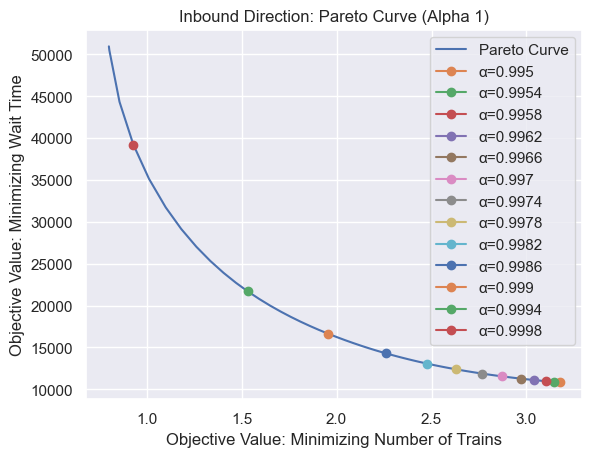

In [577]:
#Plotting the Paretto Curve
plt.plot(obj_1, obj_2, label='Pareto Curve')

for i in range(len(alpha_1_values)):
    if i % 8 == 0:
        plt.plot(obj_1[i],obj_2[i], marker='o', label=f'α={round(alpha_1_values[i],4)}')
plt.title('Inbound Direction: Pareto Curve (Alpha 1)')
plt.ylabel('Objective Value: Minimizing Wait Time')
plt.xlabel('Objective Value: Minimizing Number of Trains')
plt.legend()
plt.show()


### Optimization in Direction 1

In [559]:
average_flow_min_matrix_1 = pivot_df_1

In [560]:
average_flow_min_matrix_1

time_period_id,0,1,2,3,4,5,6,7,8
stop_id,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.572222,5.600000,9.041667,4.218519,10.933333,32.700000,10.614286,4.016667,0.133333
2,0.677778,7.200000,12.716667,8.133333,19.560000,64.946667,25.071429,9.450000,0.800000
3,0.844444,8.816667,15.341667,11.166667,25.960000,86.320000,33.509524,12.616667,1.166667
4,1.661111,16.800000,33.708333,20.737037,33.893333,97.520000,38.319048,14.208333,1.244444
5,2.216667,23.450000,44.216667,25.348148,39.193333,109.253333,43.780952,15.950000,1.388889
6,3.444444,37.933333,76.183333,32.503704,37.953333,96.686667,40.147619,15.866667,1.327778
7,4.727778,59.316667,87.583333,34.311111,38.480000,90.646667,37.671429,15.041667,1.244444
8,5.811111,76.733333,111.358333,38.462963,38.620000,77.480000,28.352381,10.191667,0.927778


In [561]:
#Model 7: Minimize average wait time
m_7 = gp.Model(env=env)

n_tb = m_7.addMVar((9,3), vtype=GRB.CONTINUOUS, name='n')
z_tb = m_7.addMVar((9,3), vtype=GRB.CONTINUOUS, name='z')


m_7.setObjective(
        gp.quicksum(average_flow_min_matrix_1[t][i] * 0.5 * z_tb[t][b] for t in range(9) for b in list(branches_dict.keys()) for i in branches_dict[b]
    ),
    sense=GRB.MINIMIZE
)

m_7.addConstrs((z_tb[t][b]*n_tb[t][b] == 1 for t in range(9) for b in branches_dict.keys()), name='variable') 

m_7.addConstrs((z_tb[t][b] >= 1/Number_of_trains_per_minute for t in range(9) for b in branches_dict.keys()), name='varia')

m_7.addConstrs((n_tb[t][0]==n_tb[t][1]+n_tb[t][2] for t in range(9)), name="branch_constraint")

m_7.params.NonConvex = 2



In [562]:
m_7.optimize()

status = m_7.status
if status == GRB.OPTIMAL:
    print("Optimal solution found.", m_7.objVal)
else:
    print("Model status:", status)

Optimal solution found. 13081.298403653727


In [563]:
time_periods = [0, 1, 2, 3, 4, 5,6,7,8]
branches = [0,1,2]

pd.DataFrame(n_tb.getAttr('x'), index=time_periods, columns=branches)

,0,1,2
0,0.216667,0.090065,0.126602
1,0.216667,0.096171,0.120496
2,0.216667,0.095036,0.121631
3,0.216667,0.101749,0.114918
4,0.216667,0.111307,0.105360
5,0.216667,0.100928,0.115739
6,0.216667,0.108259,0.108408
7,0.216667,0.126795,0.089872
8,0.216667,0.128510,0.088157


In [582]:
#Model 8: Minimize number of trains
m_8 = gp.Model(env=env)

n_tb = m_8.addMVar((9,3), vtype=GRB.CONTINUOUS, name='n')
z_tb = m_8.addMVar((9,3), vtype=GRB.CONTINUOUS, name='z')

max_wait_time = 8

m_8.setObjective(
        gp.quicksum(n_tb[t][b] for t in range(9) for b in list(branches_dict.keys())
    ),
    sense=GRB.MINIMIZE
)

m_8.addConstrs((n_tb[t][b] <= Number_of_trains_per_minute for t in range(9) for b in branches_dict.keys()), name='varia')
m_8.addConstrs((z_tb[t][b]*n_tb[t][b] == 1 for t in range(9) for b in branches_dict.keys()), name='variable') 

m_8.addConstrs(
    (0.5*z_tb[t][b] <= max_wait_time for t in range(9) for b in branches_dict.keys()),
    name='varia')

m_8.addConstrs(
    (n_tb[t][b]*Capacity_per_train >= average_flow_min_matrix_1.max().max() for t in range(9) for b in branches_dict.keys()), name='varia')

m_8.addConstrs((n_tb[t][0]==n_tb[t][1]+n_tb[t][2] for t in range(9)), name="branch_constraint")

m_8.params.NonConvex = 2

m_8.update()

In [583]:
m_8.optimize()

status = m_8.status
if status == GRB.OPTIMAL:
    print("Optimal solution found.", m_8.objVal)
else:
    print("Model status:", status)

Optimal solution found. 2.25


In [566]:
time_periods = [0, 1, 2, 3, 4, 5,6,7,8]
branches = [0,1,2]

pd.DataFrame(n_tb.getAttr('x'), index=time_periods, columns=branches)

,0,1,2
0,0.125,0.0625,0.0625
1,0.125,0.0625,0.0625
2,0.125,0.0625,0.0625
3,0.125,0.0625,0.0625
4,0.125,0.0625,0.0625
5,0.125,0.0625,0.0625
6,0.125,0.0625,0.0625
7,0.125,0.0625,0.0625
8,0.125,0.0625,0.0625


In [584]:
#Model 9: Combined objective, minimize both number of trains and average wait time 
m_9 = gp.Model(env=env)

n_tb = m_9.addMVar((9,3), vtype=GRB.CONTINUOUS, name='n')
z_tb = m_9.addMVar((9,3), vtype=GRB.CONTINUOUS, name='z')


first_weight=0.9986
second_weight=1-first_weight

#
m_9.setObjective(
        gp.quicksum(first_weight * n_tb[t][b] + (second_weight)*(average_flow_min_matrix_1[t][i] * 0.5 * z_tb[t][b]) for t in range(9) for b in list(branches_dict.keys()) for i in branches_dict[b]
    ),
    sense=GRB.MINIMIZE
)


m_9.addConstrs((z_tb[t][b] >= 1/Number_of_trains_per_minute for t in range(9) for b in branches_dict.keys()), name='varia')

m_9.addConstrs((n_tb[t][b]*Capacity_per_train >= average_flow_min_matrix_1.max().max() for t in range(9) for b in branches_dict.keys()), name='varia')

m_9.addConstrs((z_tb[t][b]*n_tb[t][b] == 1 for t in range(9) for b in branches_dict.keys()), name='variable') 

m_9.addConstrs((n_tb[t][0]==n_tb[t][1]+n_tb[t][2] for t in range(9)), name="branch_constraint")

m_9.params.NonConvex = 2

m_9.update()


In [585]:
m_9.optimize()

status = m_9.status
if status == GRB.OPTIMAL:
    print("Optimal solution found.", m_9.objVal)
else:
    print("Model status:", status)

Optimal solution found. 44.46607969893804


In [586]:
time_periods = [0, 1, 2, 3, 4, 5,6,7,8]
branches = [0,1,2]

pd.DataFrame(60/z_tb.getAttr('x'), index=time_periods, columns=branches)

,0,1,2
0,3.448967,1.540683,1.908281
1,13.000000,5.939589,7.060417
2,13.000000,5.840924,7.159081
3,8.855421,4.334088,4.521333
4,8.868823,4.786572,4.082251
5,12.002012,6.133813,5.868200
6,7.375603,4.043685,3.331913
7,4.535881,2.878285,1.657594
8,3.081367,1.540683,1.540683


## Pareto Curve for the Combined Optimization: Direction = 1 

In [578]:
alpha_1_values = np.linspace(0.995, 1, num=100)
alpha_2_values = 1 - alpha_1_values

pareto_curve_points = []

m_9 = gp.Model(env=env)

n_tb = m_9.addMVar((9,3), vtype=GRB.CONTINUOUS, name='n')
z_tb = m_9.addMVar((9,3), vtype=GRB.CONTINUOUS, name='z')


for alpha_1, alpha_2 in zip(alpha_1_values, alpha_2_values):   

    # Update alpha_1 and alpha_2 values in the objective function
    m_9.setObjective(
        gp.quicksum(alpha_1 * n_tb[t][b] + alpha_2 *(average_flow_min_matrix_1[t][i] * 0.5 * z_tb[t][b]) for t in range(9) for b in list(branches_dict.keys()) for i in branches_dict[b]
    ),
    sense=GRB.MINIMIZE)

    m_9.addConstrs((z_tb[t][b] >= 1/Number_of_trains_per_minute for t in range(9) for b in branches_dict.keys()), name='varia')

    m_9.addConstrs((n_tb[t][b]*Capacity_per_train >= average_flow_min_matrix_1.max().max() for t in range(9) for b in branches_dict.keys()), name='varia')

    m_9.addConstrs((z_tb[t][b]*n_tb[t][b] == 1 for t in range(9) for b in branches_dict.keys()), name='variable') 

    m_9.addConstrs((n_tb[t][0]==n_tb[t][1]+n_tb[t][2] for t in range(9)), name="branch_constraint")

    m_9.params.NonConvex = 2

    m_9.update()

    time_periods = [0, 1, 2, 3, 4, 5,6,7,8]
    branches = [0,1,2]

    m_9.optimize()

    ntb_sols = pd.DataFrame(n_tb.getAttr('x'), index=time_periods, columns=branches)  

    ztb_sols= pd.DataFrame(z_tb.getAttr('x'), index=time_periods, columns=branches)

    obj_1 = sum(ntb_sols.loc[t, b] for t in range(9) for b in branches_dict.keys())
    obj_2 = sum(average_flow_min_matrix_1[t][i] * 0.5 * ztb_sols.loc[t, b]
                for t in range(9) for b in branches_dict.keys() for i in branches_dict[b])

    
    pareto_curve_points.append((obj_1, obj_2, alpha_1))

    if alpha_1 == 1:
        print(ntb_sols, ztb_sols)


# Extract the results
obj_1, obj_2, alpha_1_values = zip(*pareto_curve_points) #alpha 1 wants to minimize # of trains 

    





          0         1         2
0  0.051356  0.025678  0.025678
1  0.051356  0.025678  0.025678
2  0.051356  0.025678  0.025678
3  0.051356  0.025678  0.025678
4  0.051356  0.025678  0.025678
5  0.051356  0.025678  0.025678
6  0.051356  0.025678  0.025678
7  0.051356  0.025678  0.025678
8  0.051356  0.025678  0.025678            0          1          2
0  19.471879  38.943759  38.943759
1  19.471879  38.943759  38.943759
2  19.471879  38.943759  38.943759
3  19.471879  38.943759  38.943759
4  19.471879  38.943759  38.943759
5  19.471879  38.943759  38.943759
6  19.471879  38.943759  38.943759
7  19.471879  38.943759  38.943759
8  19.471879  38.943759  38.943759


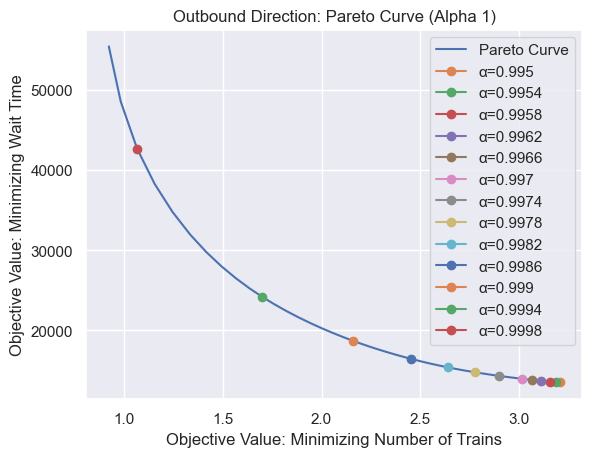

In [579]:
plt.plot(obj_1, obj_2, label='Pareto Curve')

for i in range(len(alpha_1_values)):
    if i % 8 == 0:
        plt.plot(obj_1[i],obj_2[i], marker='o', label=f'α={round(alpha_1_values[i],4)}')
plt.title('Outbound Direction: Pareto Curve (Alpha 1)')
plt.ylabel('Objective Value: Minimizing Wait Time')
plt.xlabel('Objective Value: Minimizing Number of Trains')
plt.legend()
plt.show()